In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Цель: проанализировать данные для понимания структуры
# Проверить свои гипотезы/предположения, посмотреть, какие факторы влияют на выживаемость

import pandas as pd #библиотека для работы с таблицами, структурой dataframe
import numpy as np #библиотека для работы с матрицами, выш. мат.
import seaborn as sns #библиотека для визуализации данных
import matplotlib.pyplot as plt #библиотека для работы с анализом данных, таблицами
%matplotlib inline

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
Titanic



/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**PassengerId** - идентификатор пассажира

**Survived** - выжил/не выжил

**Pclass** - класс билета

**Name** - имя пассажира

**Sex** - пол

**Age** - возраст

**SibSp** - количество братьев/сестер/супругов на борту

**Parch** - количество родителей/детей на борту

**Ticket** - номер билета

**Fare** - стоимость билета

**Cabin** - номер каюты

**Embarked** - порт посадки


In [2]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# Изменяю имена столбцов на более мне понятные

Titanic = Titanic.rename(columns = {'SibSp' : 'SiblingsSpou',
                         'PassengerId' : 'PassengerID'})

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


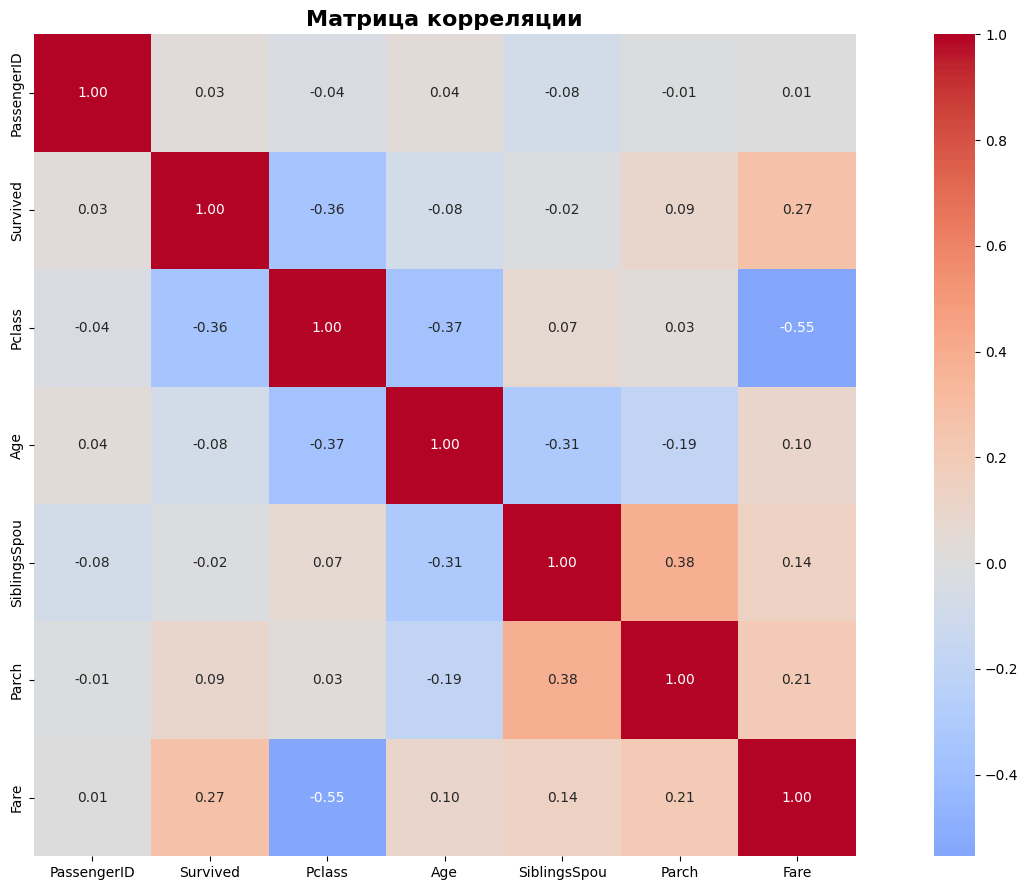

In [4]:
# Матрица корреляции помогает понять, какие переменные стоит учитывать при анализе.

numeric_columns = Titanic.select_dtypes(include=[np.number]).columns


Titanic_numeric = Titanic[numeric_columns].copy()
Titanic_numeric = Titanic_numeric.dropna()  

correlation_matrix = Titanic_numeric.corr()
plt.figure(figsize=(16, 9))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            square=True, 
            fmt='.2f')

plt.title('Матрица корреляции', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [5]:
Titanic.isnull().sum()

PassengerID       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SiblingsSpou      0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [6]:
# По данным из интернета, средний возраст пассажира самолёта в 2025 ссоставляет 35-42 года. Узнаем, в нашем самолёте пассажиры среднестатистического возраста или нет. Найдём средний возраст пассажира из имеющихся данных.
mean_age = Titanic['Age'].mean()
print(mean_age)

if mean_age < 35:
    print(f"Вывод: в нашем самолёте пассажиры моложе, чем в большинстве случаев.")
elif 35 <= mean_age <= 42:
    print(f"Вывод: в нашем самолёте пассажиры среднестатистического возраста.")
else:
    print(f"Вывод: в нашем самолёте пассажиры старше, чем в большинстве случаев.")

29.69911764705882
Вывод: в нашем самолёте пассажиры моложе, чем в большинстве случаев.


In [7]:
Titanic.describe()

,PassengerID,Survived,Pclass,Age,SiblingsSpou,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


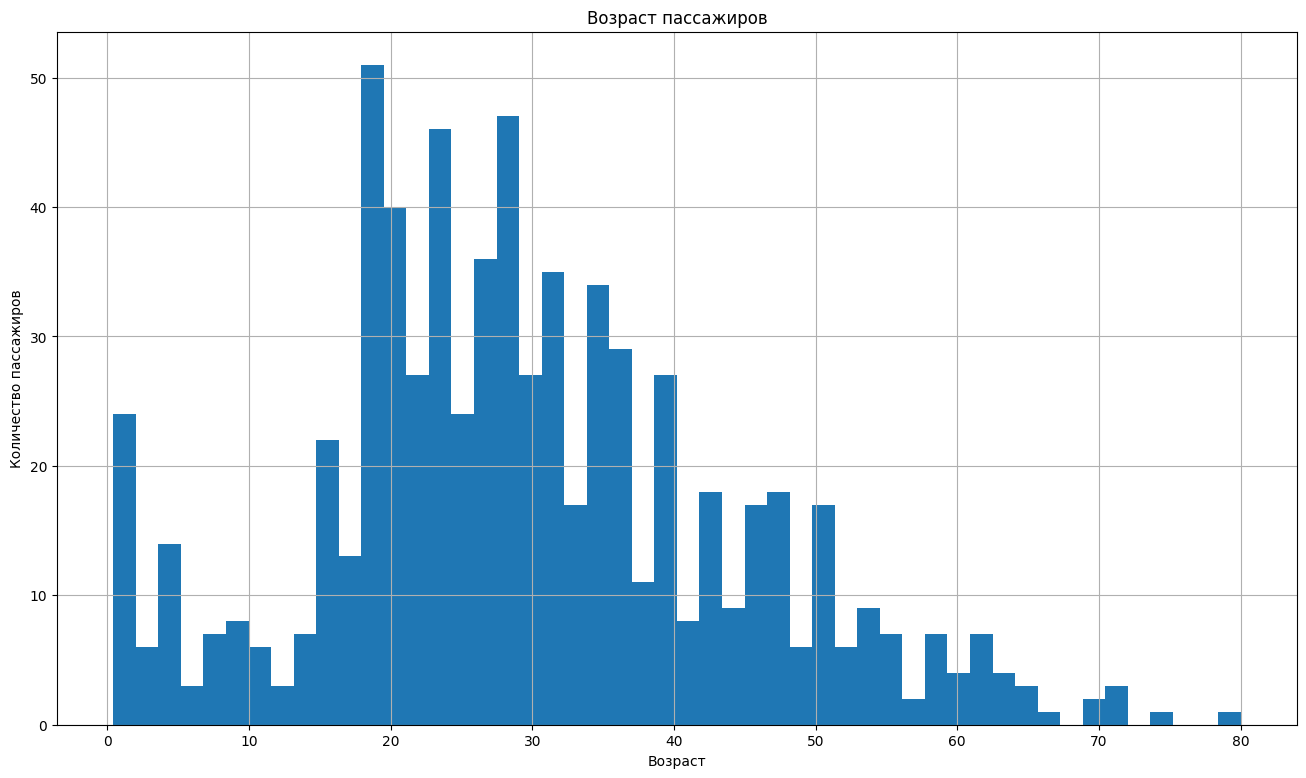

In [8]:
# По статистике в 2025 году чаще всего на борту самолёта встречается пассажир с возрастом 32 года. Предполагаю, что самый частовстречающийся возраст на борту нашего самолёта меньше среднестатистического. Создадим график и узнаем.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Age'].dropna(), bins=50)
plt.title('Возраст пассажиров')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Самый частовстречающийся возраст на борту нашего самолёта в районе 19 лет. Я был прав.

In [9]:
# Предполагаю, что на борту с таким количеством пассажиров были женщины, которые имели уникальное имя среди всех женщин в самолёте, таких женщин было больше 40.  


women = Titanic[Titanic['Sex'] == 'female'].copy()
women['FirstName'] = women['Name'].str.split(',').str[1].str.split('.').str[1].str.strip()
women['FirstName'] = women['FirstName'].str.split().str[0]
name_counts = women['FirstName'].value_counts()

unique_names_count = (name_counts == 1).sum()

print(f"Количество уникальных имён среди женщин: {unique_names_count}")

if unique_names_count > 40:
    print(f"Я был прав")
else:
    print(f"Я был не прав")

Количество уникальных имён среди женщин: 158
Я был прав


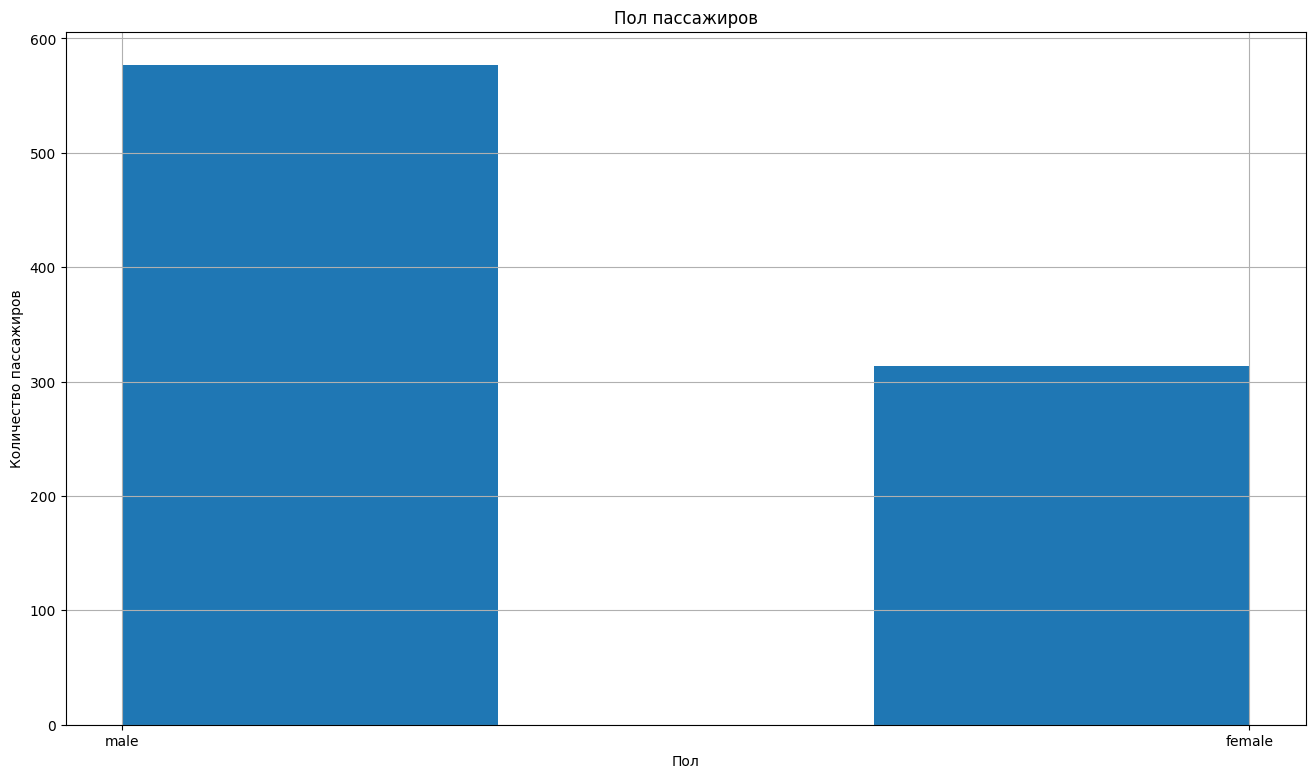

In [10]:
# Предполагаю, что мужчин и женщин на борту примерно поровну, максимальный разброс 100 человек.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Sex'].dropna(), bins=3)
plt.title('Пол пассажиров')
plt.xlabel('Пол')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Женщин немного больше 300, а мужчин значительно больше 500. Я был не прав.

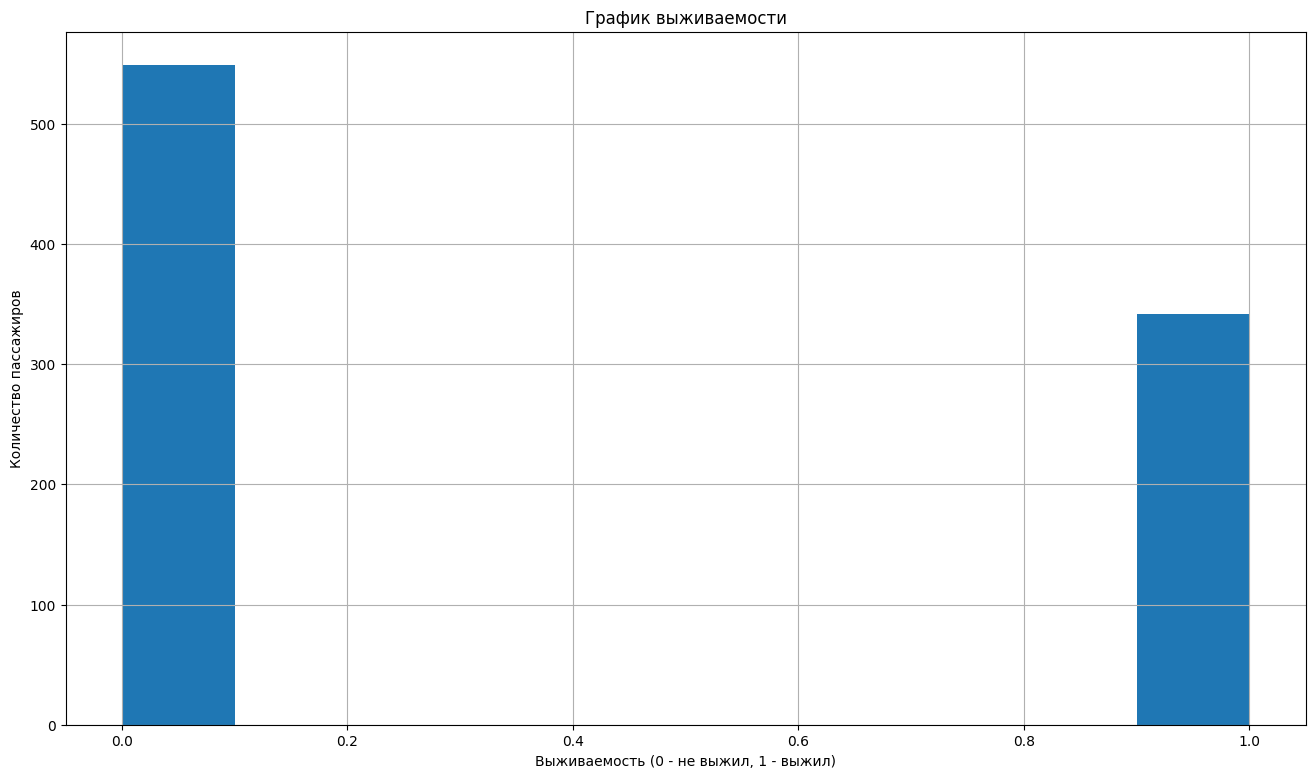

Большинство пассажиров не выжило. Я был прав.


In [11]:
# Думаю, что большинство пассажиров не выжило.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
survived_statistics = Titanic['Survived'].value_counts()
total_passengers = len(Titanic)
death_statistics = (survived_statistics[0] / total_passengers) * 100
survival_statistics = (survived_statistics[1] / total_passengers) * 100

plt.figure(figsize=(16, 9))
plt.hist(Titanic['Survived'].dropna(), bins=10)
plt.title('График выживаемости')
plt.xlabel('Выживаемость (0 - не выжил, 1 - выжил)')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

if survived_statistics[0] > survived_statistics[1]:
    print(f"Большинство пассажиров не выжило. Я был прав.")
else:
    print(f"Большинство пассажиров выжило. Я был не прав.")

In [12]:
Titanic.sort_values(by='Age')

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [13]:
Table = Titanic.groupby(['Sex'], as_index=False) \
      .agg({'Survived': 'mean'}) \
      .sort_values('Survived', ascending=False)

Table.head(2)

,Sex,Survived
0,female,0.742038
1,male,0.188908


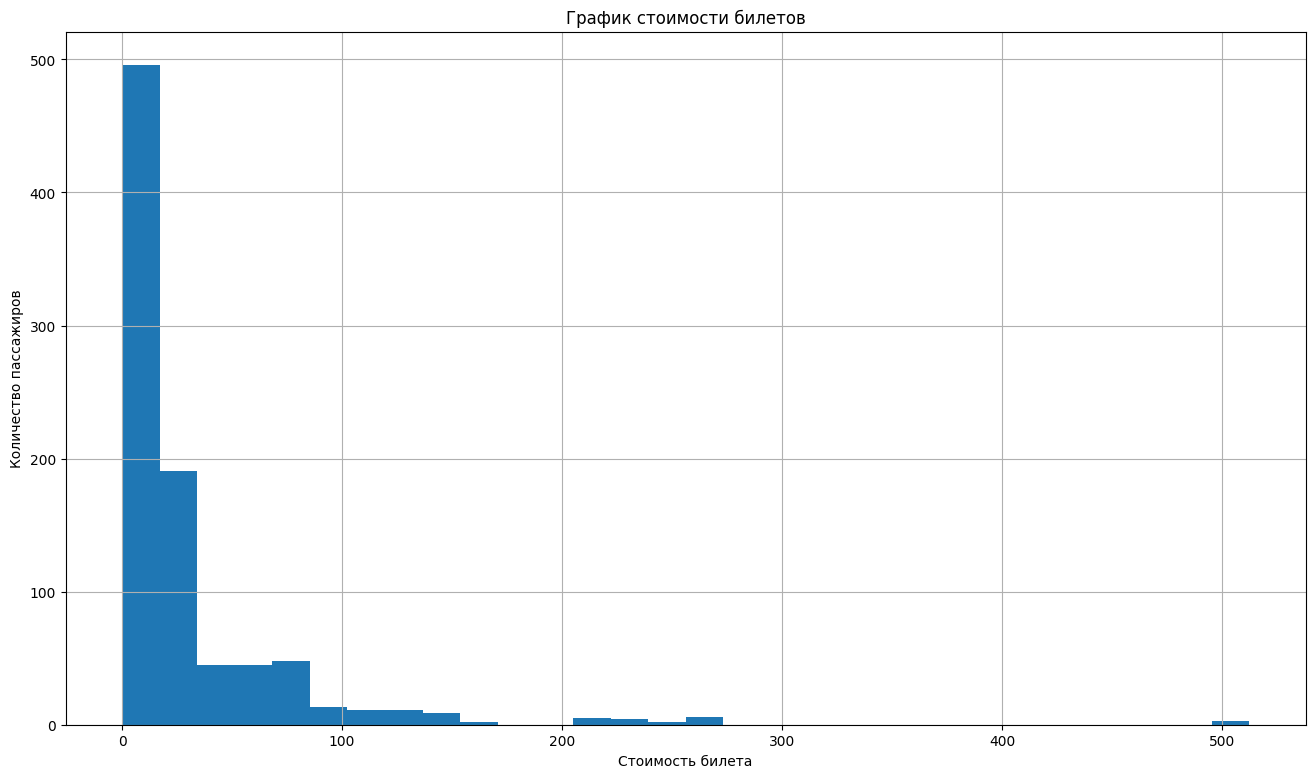

In [14]:
# Я думаю, что низких и средних по стоимости билетов поровну, а дорогих значительно меньше.

Titanic = pd.read_csv('/kaggle/input/task-1/Titanic.csv')
plt.figure(figsize=(16, 9))
plt.hist(Titanic['Fare'].dropna(), bins=30)
plt.title('График стоимости билетов')
plt.xlabel('Стоимость билета')
plt.ylabel('Количество пассажиров')
plt.grid()
plt.show()

# Практически все билеты низкие по стоимости. Средних по цене(в районе 200-300) билетов очень мало. Дорогих единицы. Я был не прав.

# Проверим гипотезу: люди, у которых не было родственников на борту, выживали чаще

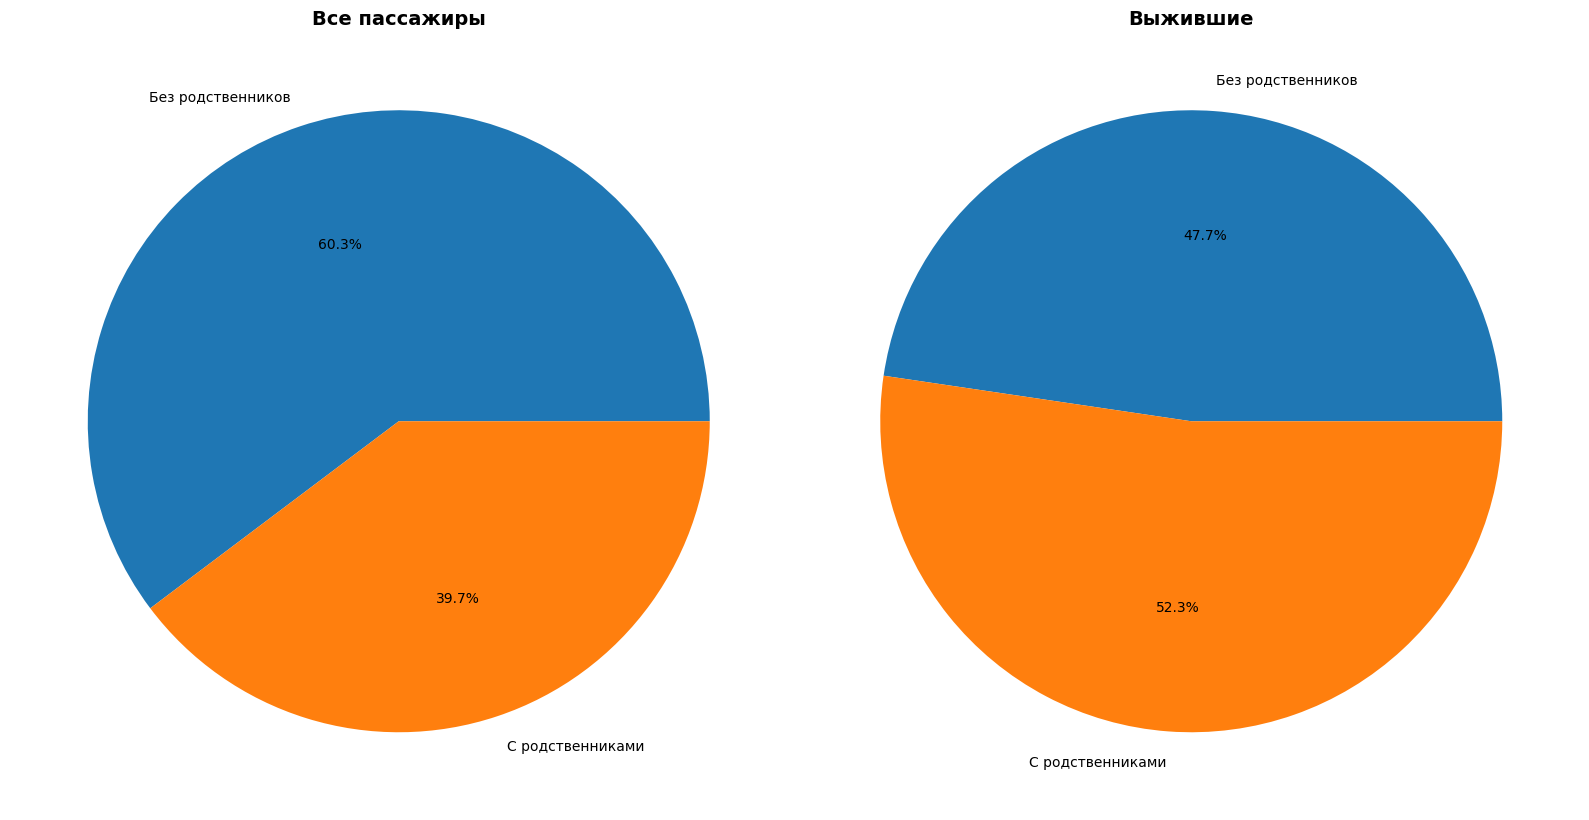

In [17]:
Titanic['HasRelatives'] = (Titanic['SiblingsSpou'] + Titanic['Parch']) > 0

groups_ordered = [False, True]
group_labels = ['Без родственников', 'С родственниками']

total_counts = Titanic['HasRelatives'].value_counts().reindex(groups_ordered)
survived_counts = Titanic[Titanic['Survived'] == 1]['HasRelatives'].value_counts().reindex(groups_ordered)
total_counts = total_counts.fillna(0)
survived_counts = survived_counts.fillna(0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
ax1.pie(total_counts.values, labels=group_labels, autopct='%1.1f%%')
ax1.set_title('Все пассажиры', fontsize=14, fontweight='bold')
ax2.pie(survived_counts.values, labels=group_labels, autopct='%1.1f%%')
ax2.set_title('Выжившие', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**Гипотеза не подтвердилась. люди, у которых не было родственников на борту, выживали реже.**

# Проверим гипотезу: пассажиры с более высоким классом билета имели больший шанс выжить

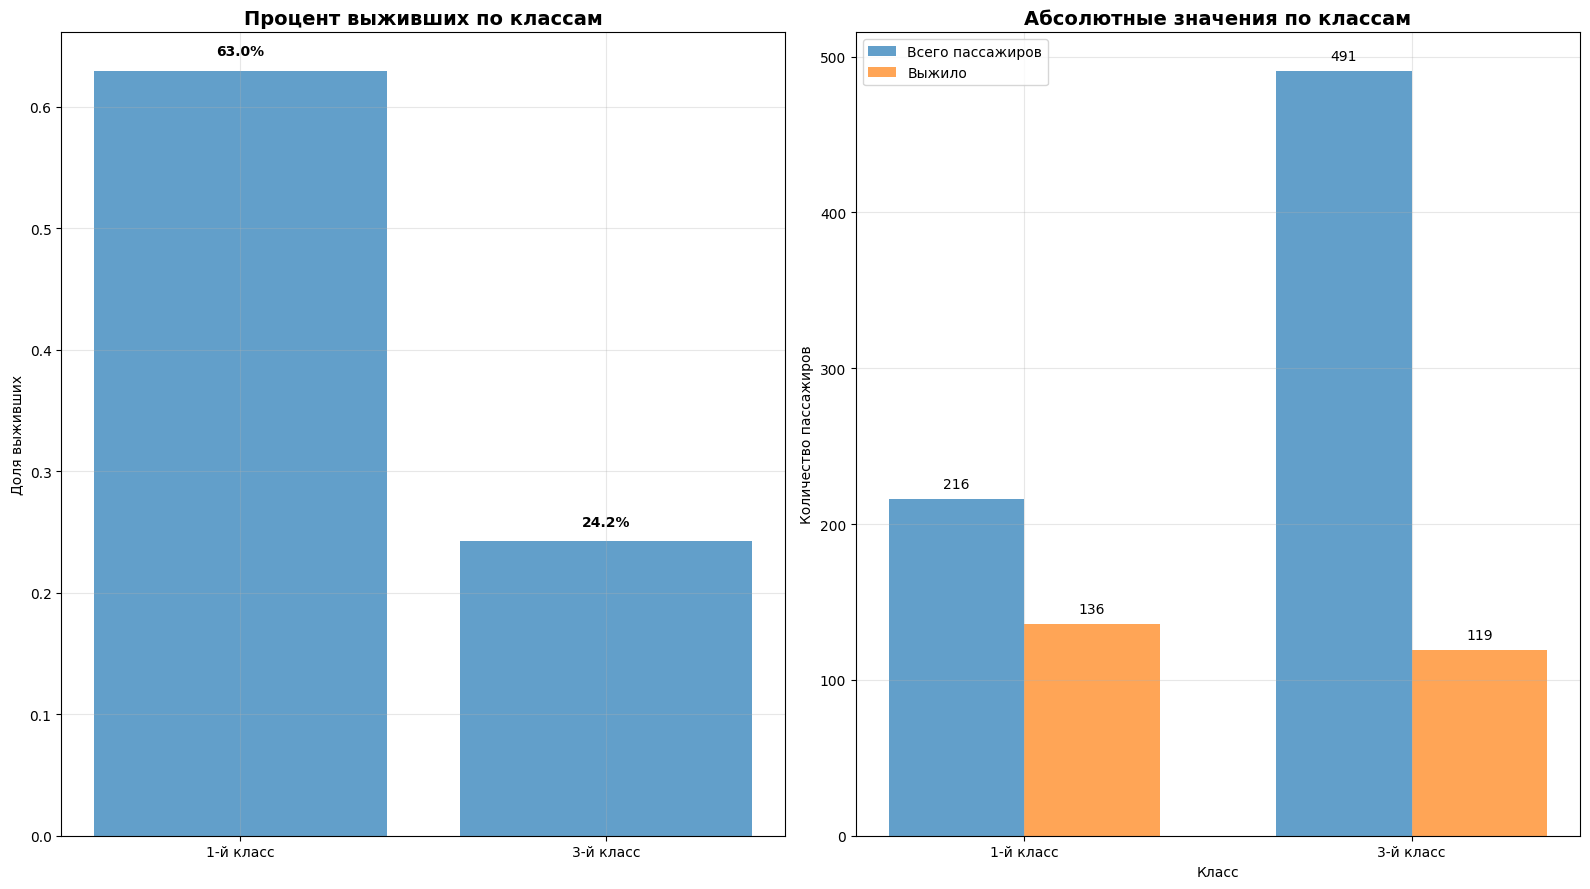

In [18]:
class1_data = Titanic[Titanic['Pclass'] == 1]
class3_data = Titanic[Titanic['Pclass'] == 3]

class1_total = len(class1_data)
class1_survived = len(class1_data[class1_data['Survived'] == 1])
class1_survival_rate = class1_survived / class1_total

class3_total = len(class3_data)
class3_survived = len(class3_data[class3_data['Survived'] == 1])
class3_survival_rate = class3_survived / class3_total

classes = ['1-й класс', '3-й класс']
survival_rates = [class1_survival_rate, class3_survival_rate]
total_passengers = [class1_total, class3_total]
survived_counts = [class1_survived, class3_survived]

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars1 = plt.bar(classes, survival_rates, alpha=0.7)
plt.ylabel('Доля выживших')
plt.title('Процент выживших по классам', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
x = np.arange(len(classes))
width = 0.35

bars2_1 = plt.bar(x - width/2, total_passengers, width, label='Всего пассажиров', alpha=0.7)
bars2_2 = plt.bar(x + width/2, survived_counts, width, label='Выжило', alpha=0.7)

plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.title('Абсолютные значения по классам', fontsize=14, fontweight='bold')
plt.xticks(x, classes)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, count in zip(bars2_1, total_passengers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')
for bar, count in zip(bars2_2, survived_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Гипотеза подтвердилась. Пассажиры с более высоким классом билета имели больший шанс выжить.**

# **Проверим гипотезу: в процентном соотношении дети выживали чаще, чем взрослые**

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


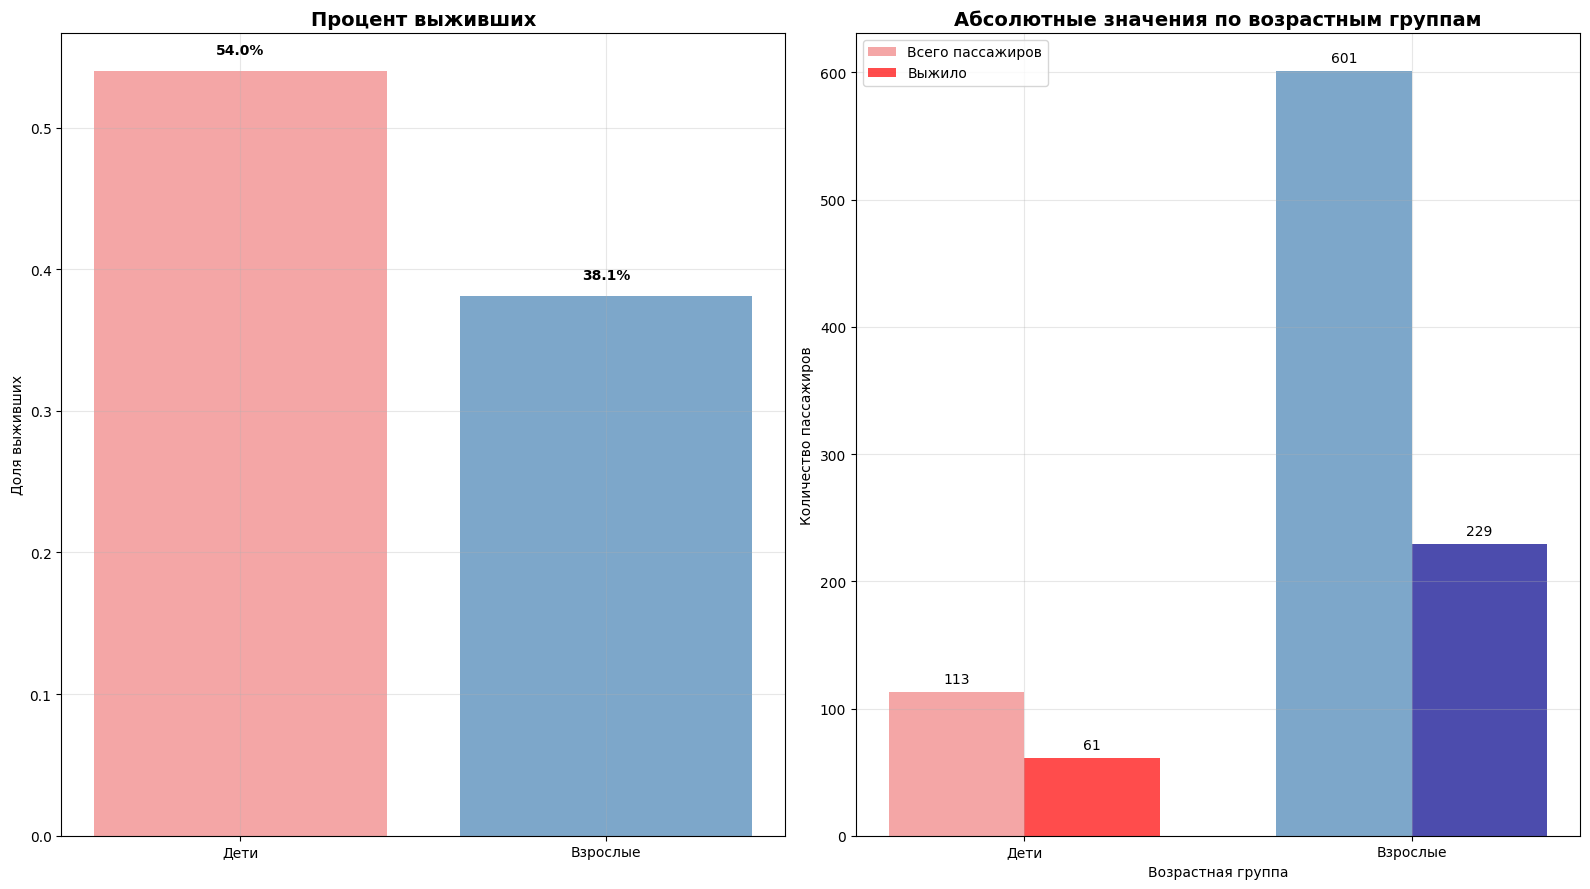

In [19]:
children_data = Titanic[Titanic['Age'] < 18]
adults_data = Titanic[Titanic['Age'] >= 18]

children_total = len(children_data)
children_survived = len(children_data[children_data['Survived'] == 1])
children_survival_rate = children_survived / children_total

adults_total = len(adults_data)
adults_survived = len(adults_data[adults_data['Survived'] == 1])
adults_survival_rate = adults_survived / adults_total

groups = ['Дети', 'Взрослые']
survival_rates = [children_survival_rate, adults_survival_rate]
total_passengers = [children_total, adults_total]
survived_counts = [children_survived, adults_survived]

plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
bars1 = plt.bar(groups, survival_rates, alpha=0.7, color=['lightcoral', 'steelblue'])
plt.ylabel('Доля выживших')
plt.title('Процент выживших', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

for bar, rate in zip(bars1, survival_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

plt.subplot(1, 2, 2)
x = np.arange(len(groups))
width = 0.35

bars2_1 = plt.bar(x - width/2, total_passengers, width, label='Всего пассажиров', alpha=0.7, color=['lightcoral', 'steelblue'])
bars2_2 = plt.bar(x + width/2, survived_counts, width, label='Выжило', alpha=0.7, color=['red', 'darkblue'])

plt.xlabel('Возрастная группа')
plt.ylabel('Количество пассажиров')
plt.title('Абсолютные значения по возрастным группам', fontsize=14, fontweight='bold')
plt.xticks(x, groups)
plt.legend()
plt.grid(True, alpha=0.3)

for bar, count in zip(bars2_1, total_passengers):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')
for bar, count in zip(bars2_2, survived_counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
             f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

**Гипотеза подтвердилась. В процентном соотношении дети выживали чаще, чем взрослые**

# Векторизация

In [21]:
categorical_cols = Titanic.select_dtypes(include=['object']).columns
label_encoders = {}

In [22]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    Titanic[col] = le.fit_transform(Titanic[col])
    label_encoders[col] = le

In [24]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerID   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    int64  
 4   Sex           891 non-null    int64  
 5   Age           714 non-null    float64
 6   SiblingsSpou  891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    int64  
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    int64  
 11  Embarked      891 non-null    int64  
 12  HasRelatives  891 non-null    bool   
dtypes: bool(1), float64(2), int64(10)
memory usage: 84.5 KB


In [25]:
Titanic.isnull().sum()

PassengerID       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
SiblingsSpou      0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
HasRelatives      0
dtype: int64

In [29]:
Titanic.fillna({'Age': Titanic['Age'].median()}, inplace=True)

In [30]:
Titanic.isnull().sum()

PassengerID     0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SiblingsSpou    0
Parch           0
Ticket          0
Fare            0
Cabin           0
Embarked        0
HasRelatives    0
dtype: int64

In [31]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerID   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    int64  
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SiblingsSpou  891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    int64  
 9   Fare          891 non-null    float64
 10  Cabin         891 non-null    int64  
 11  Embarked      891 non-null    int64  
 12  HasRelatives  891 non-null    bool   
dtypes: bool(1), float64(2), int64(10)
memory usage: 84.5 KB


In [33]:
X = Titanic.drop(columns=['Survived'])
y = Titanic['Survived']

In [34]:
Titanic['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [35]:
X

,PassengerID,Pclass,Name,Sex,Age,SiblingsSpou,Parch,Ticket,Fare,Cabin,Embarked,HasRelatives
0,1,3,108,1,22.0,1,0,523,7.2500,147,2,True
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,True
2,3,3,353,0,26.0,0,0,669,7.9250,147,2,False
3,4,1,272,0,35.0,1,0,49,53.1000,55,2,True
4,5,3,15,1,35.0,0,0,472,8.0500,147,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,548,1,27.0,0,0,101,13.0000,147,2,False
887,888,1,303,0,19.0,0,0,14,30.0000,30,2,False
888,889,3,413,0,28.0,1,2,675,23.4500,147,2,True
889,890,1,81,1,26.0,0,0,8,30.0000,60,0,False


In [36]:
Titanic['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [37]:
Titanic.corr()

,PassengerID,Survived,Pclass,Name,Sex,Age,SiblingsSpou,Parch,Ticket,Fare,Cabin,Embarked,HasRelatives
PassengerID,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.057462
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.203367
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,-0.135207
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.070722
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.303646
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,-0.171647
SiblingsSpou,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.584471
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.583398
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,-0.028314
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,0.271832


In [38]:
np.var(Titanic['Sex'])

0.22821808306282707

In [40]:
import joblib
joblib.dump(model, 'fully-connected-model.pkl')

NameError: name 'model' is not defined

In [41]:
model_loaded = joblib.load('fully-connected-model.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'fully-connected-model.pkl'

In [42]:
model_loaded.predict(X_test)

NameError: name 'model_loaded' is not defined

In [43]:
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], 
                             bins=[0, 12, 18, 35, 60, 100], 
                             labels=['Child', 'Teenager', 'Young', 'Middle', 'Old'])

print(Titanic['AgeGroup'].value_counts().sort_index())

AgeGroup
Child        69
Teenager     70
Young       535
Middle      195
Old          22
Name: count, dtype: int64


In [44]:
Titanic['Sex_Class'] = Titanic['Sex'].astype(str) + '_' + Titanic['Age'].astype(str)
print(Titanic['Sex_Class'].value_counts().sort_index())

Sex_Class
0_0.75    2
0_1.0     2
0_10.0    1
0_11.0    1
0_13.0    2
         ..
1_71.0    2
1_74.0    1
1_8.0     2
1_80.0    1
1_9.0     4
Name: count, Length: 145, dtype: int64


In [45]:
# Давайте узнаем первые две буквы в именах первых десяти пассажиров в таблице. Ранее колонка Name была преобразована в числовой тип, поэтому буквы - это цифры в данном случае.

Titanic['The_First_Two_Letters'] = Titanic['Name'].astype(str).str[:2]
print("Первые две буквы из имен первых 10 пассажиров:")
print(Titanic['The_First_Two_Letters'].head(10))

Первые две буквы из имен первых 10 пассажиров:
0    10
1    19
2    35
3    27
4    15
5    55
6    51
7    62
8    41
9    57
Name: The_First_Two_Letters, dtype: object


In [46]:
# Полагаю, что пассажиры чаще выживали во 2-м классе, чем в 3-м. Проверим это при помощи метода векторизации "бинарное кодирование"

Titanic['Class2_Survival'] = (Titanic['Pclass'] == 2).astype(int)
Titanic['Class3_Survival'] = (Titanic['Pclass'] == 3).astype(int)

survival_2 = Titanic[Titanic['Class2_Survival'] == 1]['Survived'].mean()
survival_3 = Titanic[Titanic['Class3_Survival'] == 1]['Survived'].mean()

if survival_2 > survival_3: 
    print("Пассажиры выживали чаще во 2-м классе. Моё предположение верное.") 
else:
    print("Пассажиры выживали чаще в 3-м классе. Моё предположение неверное.")

Пассажиры выживали чаще во 2-м классе. Моё предположение верное.


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

features = ['Pclass', 'Sex', 'Age', 'SiblingsSpou', 'Parch', 'Fare']
X = Titanic[features]
y = Titanic['Survived']
X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())
X['Sex'] = X['Sex'].map({'male': 1, 'female': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_model = LogisticRegression(random_state=42, max_iter=1000)
linear_model.fit(X_train, y_train)

plt.figure(figsize=(16, 9))
coefficients = linear_model.coef_[0]
features_names = features

colors = ['green' if x > 0 else 'red' for x in coefficients]
plt.barh(features_names, coefficients, color=colors, alpha=0.7)
plt.axvline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Влияние признаков на выживаемость')
plt.xlabel('Сила влияния')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_38/2413424654.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Age'] = X['Age'].fillna(X['Age'].median())
/tmp/ipykernel_38/2413424654.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fare'] = X['Fare'].fillna(X['Fare'].median())
/tmp/ipykernel_38/2413424654.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [48]:
# Создадим дерево о влиянии возраста до 30 лет на выживаемость

from sklearn.tree import DecisionTreeClassifier, plot_tree


Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].median())

Titanic['Age_under_30'] = (Titanic['Age'] < 30).astype(int)

available_columns = Titanic.columns.tolist()

features = ['Pclass', 'Age_under_30', 'SiblingsSpou', 'Parch', 'Fare']

if 'Sex' in available_columns:
    Titanic = pd.get_dummies(Titanic, columns=['Sex'], drop_first=True)
    features.append('Sex_male')

if 'Embarked' in available_columns:
    Titanic = pd.get_dummies(Titanic, columns=['Embarked'], drop_first=True)
    features.extend(['Embarked_Q', 'Embarked_S'])

X = Titanic[features]
y = Titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

plt.figure(figsize=(15, 8))
plot_tree(tree, 
          feature_names=features,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Проверка влияния возраста до 30 лет')
plt.show()

KeyError: "['Sex_male', 'Embarked_Q', 'Embarked_S'] not in index"

In [49]:
# Создадим модель "модификация градиентного бустинга" и определим её точность

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingClassifier(
    n_estimators=50,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# При помощи модели выясним, какой признак самый важный для выживаемости

importance = gb_model.feature_importances_

for feature, imp in zip(features, importance):
    print(f"• {feature}: {imp:.1%}")

The_most_important_idx = importance.argmax()
The_most_important_feature = features[The_most_important_idx]
The_most_important_value = importance[The_most_important_idx]

if The_most_important_feature == 'Pclass':
    print("Класс билета - главный фактором выживания")
elif The_most_important_feature == 'Age':
    print("Возраст - главный фактором выживания")
else:
    print("Стоимость билета - главный фактором выживания")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.726
• Pclass: 27.3%
• Age: 29.5%
• Fare: 43.2%
Стоимость билета - главный фактором выживания
Анализ ошибок: ложные 'выжил' - 5, ложные 'погиб' - 44


In [50]:
# Создадим модель "нейронная сеть" и определим её точность

from sklearn.neural_network import MLPClassifier

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nn_model = MLPClassifier(
    hidden_layer_sizes=(10,),
    max_iter=1000,
    random_state=42
)

nn_model.fit(X_train, y_train)

y_pred_nn = nn_model.predict(X_test)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f"Accuracy: {accuracy_nn:.3f}")

# При помощи модели выясним, дети до 12 лет выживали чаще остальных(люди возрастом 12 лет и старше) или нет

Titanic['IsChild'] = (Titanic['Age'] < 12).astype(int)

child_survival = Titanic[Titanic['IsChild'] == 1]['Survived'].mean()
adult_survival = Titanic[Titanic['IsChild'] == 0]['Survived'].mean()

print(f"Дети до 12 лет: {child_survival:.1%} выживших")
print(f"Люди возрастом 12 лет и старше: {adult_survival:.1%} выживших")

if child_survival > adult_survival:
    print("Дети до 12 лет выживали чаще. Гипотеза верна.")
else:
    print("Дети до 12 лет выживали реже. Гипотеза неверна.")

# Анализ ошибок

cm = confusion_matrix(y_test, y_pred_nn)
print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Accuracy: 0.737
Дети до 12 лет: 57.4% выживших
Люди возрастом 12 лет и старше: 36.8% выживших
Дети до 12 лет выживали чаще. Гипотеза верна.
Анализ ошибок: ложные 'выжил' - 11, ложные 'погиб' - 36


In [52]:
# Я выбрал модель "градиентный бустинг", сделаем кросс-валидацию

from sklearn.model_selection import cross_val_predict

features = ['Pclass', 'Age', 'Fare']
X = Titanic[features].copy()
y = Titanic['Survived']

X['Age'] = X['Age'].fillna(X['Age'].median())
X['Fare'] = X['Fare'].fillna(X['Fare'].median())

model = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)

print("Кросс-валидация градиентного бустинга (5 фолдов):")

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
mean_score = np.mean(scores)
std_score = np.std(scores)

print(f"Средняя точность: {mean_score:.3f} (+/- {std_score:.3f})")
print(f"Фолды: {[f'{s:.3f}' for s in scores]}")

model.fit(X, y)

print(f"Итоговый вывод: разброс между фолдами: {std_score:.3f} - модель устойчивая. Точность модели {mean_score:.1%}.")

# Анализ ошибок

y_pred_cv = cross_val_predict(model, X, y, cv=5)
cm = confusion_matrix(y, y_pred_cv)

print(f"Анализ ошибок: ложные 'выжил' - {cm[0,1]}, ложные 'погиб' - {cm[1,0]}")

Кросс-валидация градиентного бустинга (5 фолдов):


NameError: name 'cross_val_score' is not defined